------------------------

<font size=7 color='#13DAE2'>
Sebastian Carrillo Mejía
</font>
<br>
<font size=7 color='#13DAE2'>
1001414595
</font>

------------------------

In [1]:
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, StandardScaler

import matplotlib.pyplot as plt


from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.optimizers import Adam

# Laboratorio
1. Para el dataset make a moon de sklearn, construir un modelo de una red neuronal con keras para clasificar los datos.

2. Para el dataset load digits, construir un modelo de red neuronal empleando keras para realizar la clasificación.

# 1.

In [2]:
from sklearn.datasets import make_moons

In [3]:
X, y = make_moons(n_samples=1000, noise=0.2, random_state=42)  # 1000 muestras y les agregamos un poco de ruido
y = y.reshape(-1, 1)

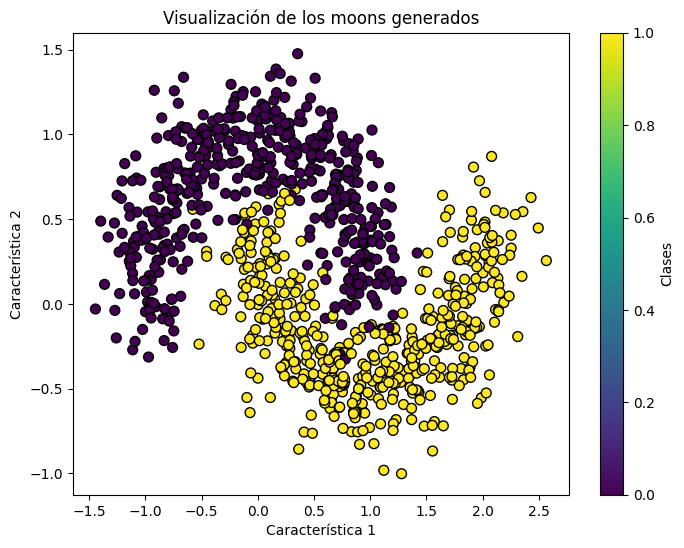

In [4]:
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', edgecolor='k', s=50)
plt.title("Visualización de los moons generados")
plt.xlabel("Característica 1")
plt.ylabel("Característica 2")
plt.colorbar(label="Clases")
plt.show()

In [5]:
scaler = StandardScaler()  # Estandarizamos las características con dist standar
X = scaler.fit_transform(X)

In [6]:
# Realizamos la separación de test y train de forma aleatoria

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
# Definimos el modelo secuencial

model = Sequential([
    Dense(16, input_shape=(X.shape[1],), activation='relu'),  # 16 neuronas, activación ReLU
    Dense(8, activation='relu'),  # 8 neuronas, activación ReLU
    Dense(1, activation='sigmoid')  # Salida binaria con activación sigmoid
])

# Compilar el modelo
model.compile(optimizer=Adam(learning_rate=0.01),
              loss='binary_crossentropy',  # Pérdida usualmente utilizada para clasificación binaria
              metrics=['accuracy'])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [8]:
# Entrenar el modelo

history = model.fit(X_train, y_train, epochs=50, batch_size=16, validation_split=0.1, verbose=1)


Epoch 1/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7666 - loss: 0.4913 - val_accuracy: 0.9000 - val_loss: 0.2427
Epoch 2/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8910 - loss: 0.2726 - val_accuracy: 0.9000 - val_loss: 0.2006
Epoch 3/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8976 - loss: 0.2400 - val_accuracy: 0.9500 - val_loss: 0.1364
Epoch 4/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9312 - loss: 0.1771 - val_accuracy: 0.9750 - val_loss: 0.0913
Epoch 5/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9513 - loss: 0.1238 - val_accuracy: 0.9750 - val_loss: 0.0761
Epoch 6/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9653 - loss: 0.1020 - val_accuracy: 0.9750 - val_loss: 0.0661
Epoch 7/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9563 - loss: 0.1255 - val_accuracy: 0.9750 - val_loss: 0.0803
Epoch 8/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9694 - loss: 0.0860 - val_accuracy: 0.9750 - val_loss:

Ahora evaluamos la convergencia del modelo a lo largo de las épocas

Train: 0.965, Test: 0.965


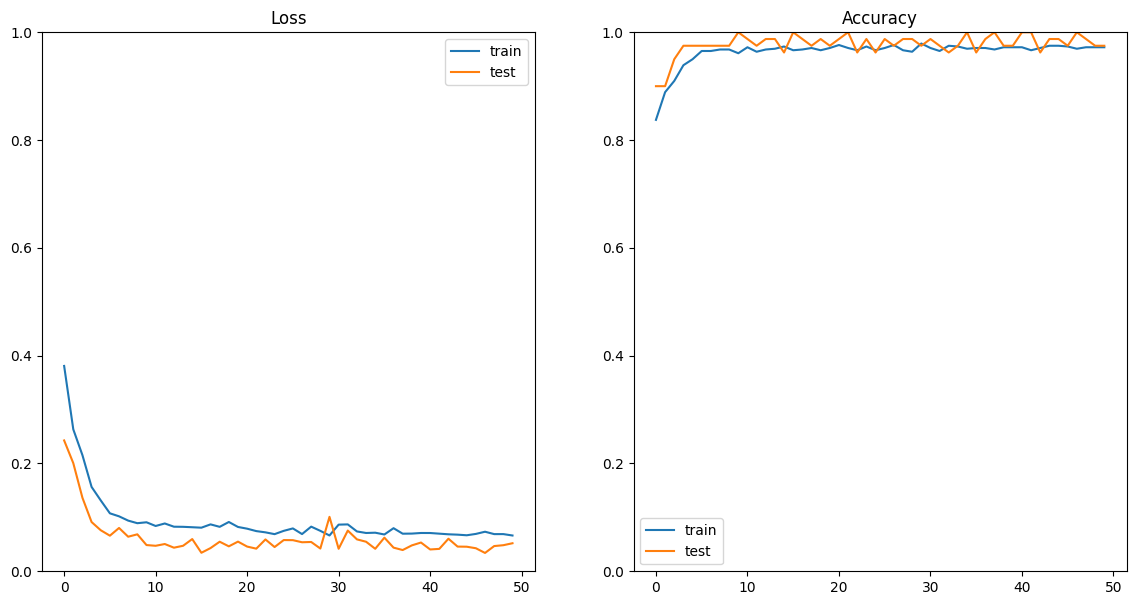

In [9]:
# Evaluación del modelo
_, train_acc = model.evaluate(X_train, y_train, verbose=0)
_, test_acc = model.evaluate(X_test, y_test, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))
# Gráficas:
plt.figure(figsize=(14,7))
# Gráfica de pérdidas durante el entrenamiento
plt.subplot(121)
plt.title('Loss')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.ylim(0,1)
# Gráfica de las precisión durante el entrenamiento
plt.subplot(122)
plt.title('Accuracy')
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.legend()
plt.ylim(0,1)
plt.show()

# 2.

In [10]:
from sklearn.datasets import load_digits

In [23]:
# Cargamos los datos

digits = load_digits(n_class=6)
X = digits.data
y = digits.target.reshape(-1, 1)
n_samples, n_features = X.shape


In [24]:
y.shape

(1083, 1)

Como podemos ver las imágenes ya estan enformato aplanado y no es necesario hacer un reshape, en este caso tenemos 1083 imágenes de entrenamiento con 64 pixeles.

In [25]:
X.shape

(1083, 64)

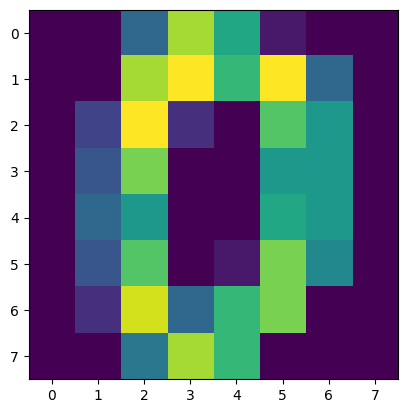

In [26]:
plt.imshow(X[0].reshape(8, 8));

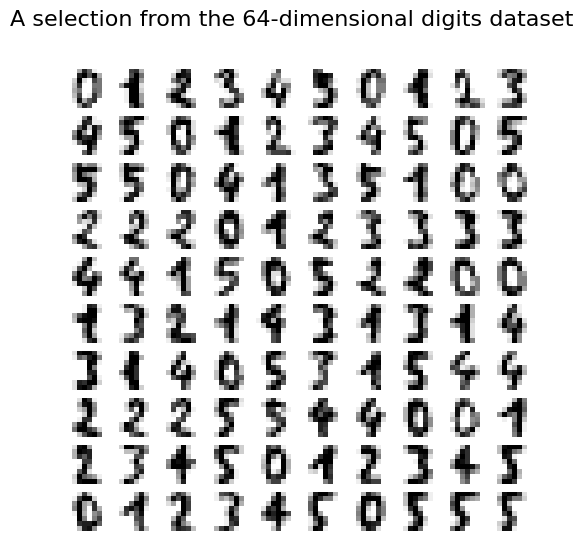

In [27]:
fig, axs = plt.subplots(nrows=10, ncols=10, figsize=(6, 6))
for idx, ax in enumerate(axs.ravel()):
    ax.imshow(X[idx].reshape((8, 8)), cmap=plt.cm.binary)
    ax.axis("off")
_ = fig.suptitle("A selection from the 64-dimensional digits dataset", fontsize=16)

Normalizamos el valor de los pixeles

In [28]:
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

In [29]:
X

array([[0.    , 0.    , 0.3125, ..., 0.    , 0.    , 0.    ],
       [0.    , 0.    , 0.    , ..., 0.625 , 0.    , 0.    ],
       [0.    , 0.    , 0.    , ..., 1.    , 0.5625, 0.    ],
       ...,
       [0.    , 0.    , 0.    , ..., 0.5625, 0.    , 0.    ],
       [0.    , 0.    , 0.    , ..., 0.25  , 0.    , 0.    ],
       [0.    , 0.    , 0.375 , ..., 0.375 , 0.    , 0.    ]])

Es importante convertir las etiquetas en vectores para su mejor manejo, usando one hot encoding.

In [30]:
encoder = OneHotEncoder(sparse_output=False)
y = encoder.fit_transform(y)

In [31]:
y.shape

(1083, 6)

In [32]:
y

array([[1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0.],
       ...,
       [0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0., 0.]])

Dado que las imágenes no son secuenciales, es correcto utilizar un split aleatorio de los datos, para esto podemos usar train_test_split desde scikit leaen

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

Ahora, estamos listos para construir nuestro modelo

In [34]:
model = Sequential([
                    Input(shape=(X.shape[1],)),
                    Dense(64, activation='relu'),
                    Dense(32, activation='relu'),
                    Dense(16,activation='relu'),
                    Dense(y.shape[1], activation='softmax')

])
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [35]:
history = model.fit(X_train, y_train, epochs=25, validation_data=(X_test, y_test))

Epoch 1/25
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.2562 - loss: 1.7443 - val_accuracy: 0.5576 - val_loss: 1.4101
Epoch 2/25
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5958 - loss: 1.3136 - val_accuracy: 0.8018 - val_loss: 0.9185
Epoch 3/25
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8427 - loss: 0.8308 - val_accuracy: 0.9585 - val_loss: 0.4774
Epoch 4/25
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9520 - loss: 0.4622 - val_accuracy: 0.9770 - val_loss: 0.2453
Epoch 5/25
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9584 - loss: 0.2528 - val_accuracy: 0.9908 - val_loss: 0.1403
Epoch 6/25
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9796 - loss: 0.1484 - val_accuracy: 0.9816 - val_loss: 0.1030
Epoch 7/25
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9852 - loss: 0.0962 - val_accuracy: 0.9954 - val_loss: 0.0669
Epoch 8/25
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9801 - loss: 0.0884 - val_accuracy: 0.9954 - val_loss:

Procedemos a evaluar el modelo y su convergencia durante las épocas

Train: 1.000, Test: 0.995


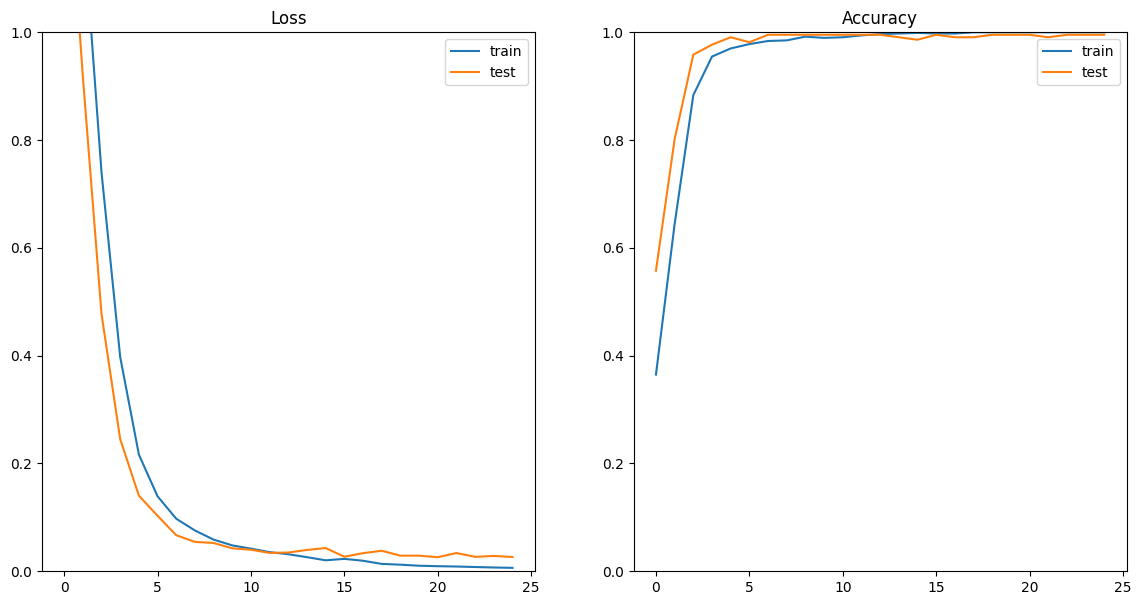

In [36]:
# Evaluación del modelo
_, train_acc = model.evaluate(X_train, y_train, verbose=0)
_, test_acc = model.evaluate(X_test, y_test, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))
# Gráficas:
plt.figure(figsize=(14,7))
# Gráfica de pérdidas durante el entrenamiento
plt.subplot(121)
plt.title('Loss')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.ylim(0,1)
# Gráfica de las precisión durante el entrenamiento
plt.subplot(122)
plt.title('Accuracy')
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.legend()
plt.ylim(0,1)
plt.show()